### <font color=orange> Import the Required Libraries </font>

In [8]:
!pip install tensorflow
!pip install keras
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow-addons

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_addons as tfa
from collections import Counter
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras import callbacks
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### <font color=orange> Define directory of dataset & Classes names </font>

In [12]:
## Set Path Here before running the code
path =  "/content/drive/MyDrive/archive (1)/Dataset"

##  Name of classes
Classes = ['Mild-Demented',
           'Moderate-Demented',
           'Non-Demented',
           'VeryMild-Demented']

### <font color=orange> Load images and Data Prepration


 </font>

In [13]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(path, target_size=(128, 128),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 6400 images belonging to 4 classes.


In [14]:
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [15]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [16]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (6400, 128, 128, 3)
Labels shape :	 (6400, 4)


In [17]:
#   Number of samples in classes
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 896), (1, 64), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


### <font color=orange> Samples from Original Dataset </font>

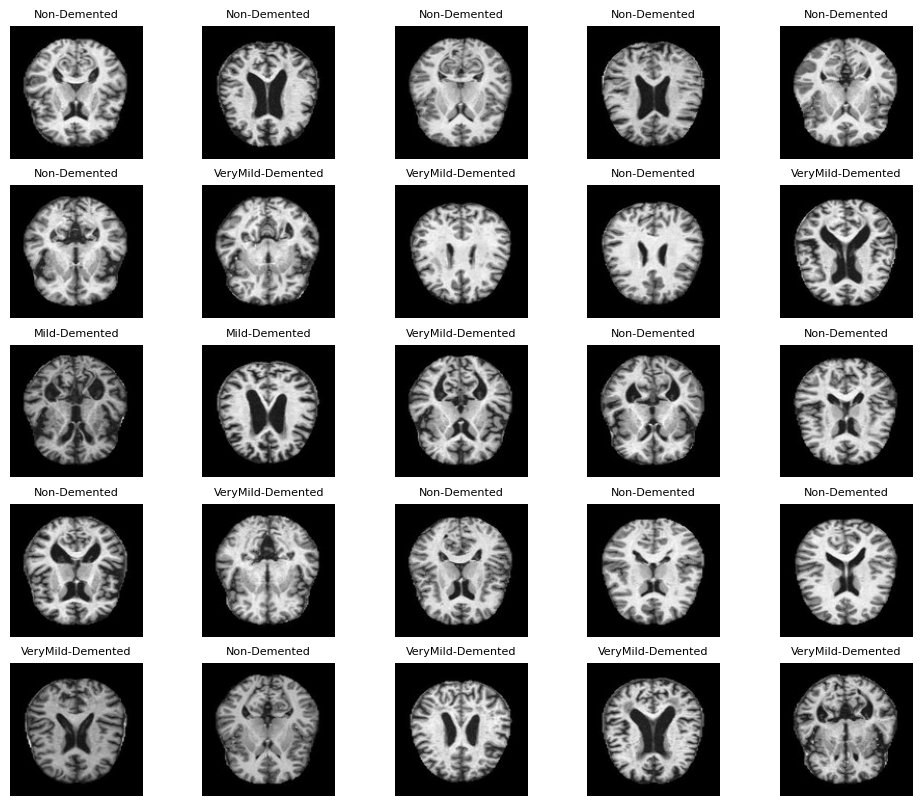

In [18]:
#   show some samples from the dataset randomly
fig = plt.figure(figsize=(12,10))

rows = 5
columns = 5

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(Classes[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

### <font color=orange>Balancing the Dataset </font>

In [19]:

X = X.reshape(-1, 128 * 128 * 3)

#   apply SMOTE to balance the dataset
X, y = SMOTE().fit_resample(X, y)

#   reshape the dataset
X = X.reshape(-1, 128, 128, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after SMOTETomek :	 [(0, 3200), (1, 3200), (2, 3200), (3, 3200)]


### <font color=orange> Random samples from the Generated dataset </font>

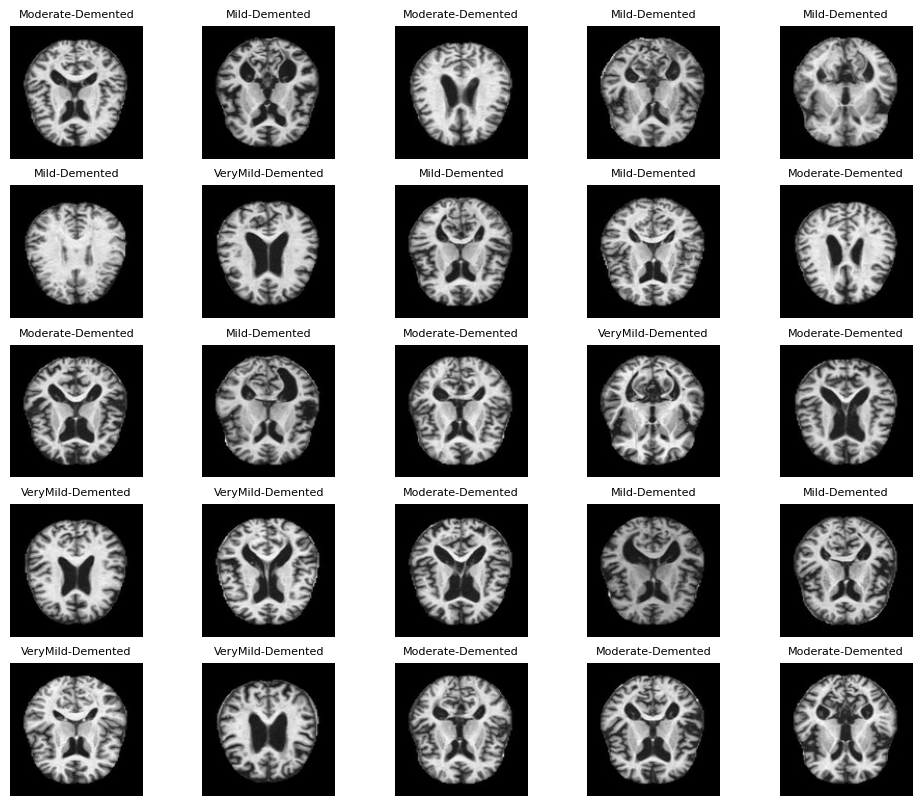

In [20]:
fig = plt.figure(figsize=(12,10))

rows = 5
columns = 5

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(samples_before, samples_after - 1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(Classes[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

### <font color=orange> Split dataset for Training, Validation & Testing </font>

In [21]:
#   20% split to validation and 80% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

#   20% split to test from 80% of train and 60% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2075), (1, 1994), (2, 2061), (3, 2062)]
Validation	 [(0, 631), (1, 678), (2, 633), (3, 618)]
Test      	 [(0, 494), (1, 528), (2, 506), (3, 520)]


In [22]:
#   to free memeory we don't need this one as we split our data
del X, y

### <font color=orange> Model Architecture </font>

In [37]:
model=Sequential()
# Convolutional Layers
model.add(Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)       

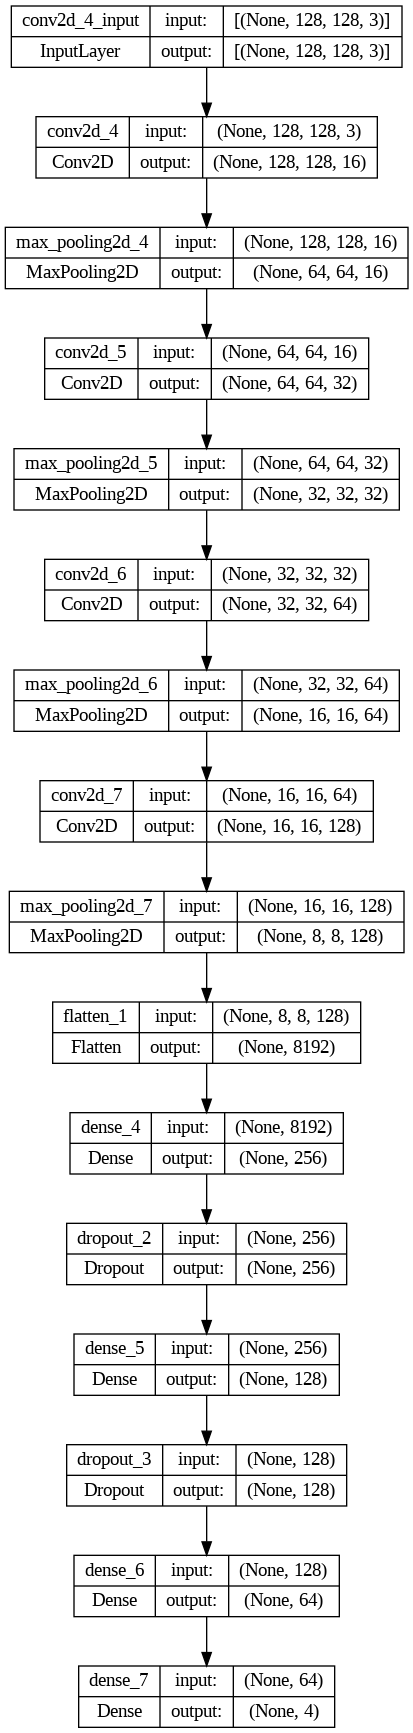

In [38]:
# plot the model
plot_model(model, show_shapes=True)

### <font color=orange> Compiling the Model </font>

In [39]:
### Model Compilation
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=4),
        tf.metrics.Precision
         (name="precision"),
        tf.metrics.Recall(name="recall") ])


### <font color=orange> Defining CALLBACKS to reduce Learning Rate </font>

In [40]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

### <font color=orange> Training of the Model </font>

In [41]:
#   declare to run on small gpu create batch sizes of images
valAug = ImageDataGenerator()

#   defining batch size
batch_size = 8

history = model.fit(valAug.flow(X_train, y_train, batch_size=batch_size, shuffle = True),
steps_per_epoch=len(X_train) // batch_size,
validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle = True),
validation_steps=len(x_test) // batch_size,
epochs= 40,
batch_size=batch_size,
callbacks = CALLBACKS
)

Epoch 1/40
1024/1024 [==============================] - 13s 10ms/step - loss: 1.3429 - acc: 0.3447 - auc: 0.6076 - f1_score: 0.3417 - precision: 0.6911 - recall: 0.0104 - val_loss: 1.1162 - val_acc: 0.5425 - val_auc: 0.7866 - val_f1_score: 0.4694 - val_precision: 0.5516 - val_recall: 0.1724 - lr: 0.0100
Epoch 2/40
1024/1024 [==============================] - 11s 11ms/step - loss: 0.8151 - acc: 0.6150 - auc: 0.8743 - f1_score: 0.6054 - precision: 0.7567 - recall: 0.4419 - val_loss: 0.6622 - val_acc: 0.6660 - val_auc: 0.9177 - val_f1_score: 0.5925 - val_precision: 0.7346 - val_recall: 0.6162 - lr: 0.0100
Epoch 3/40
1024/1024 [==============================] - 10s 10ms/step - loss: 0.6265 - acc: 0.7045 - auc: 0.9251 - f1_score: 0.7018 - precision: 0.7750 - recall: 0.6118 - val_loss: 0.5418 - val_acc: 0.7661 - val_auc: 0.9443 - val_f1_score: 0.7591 - val_precision: 0.8110 - val_recall: 0.6768 - lr: 0.0100
Epoch 4/40
1024/1024 [==============================] - 10s 9ms/step - loss: 0.4962 -

### <font color=orange> Evaluation of Model  </font>

In [42]:
### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3])/4) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

64/64 [==============================] - 1s 8ms/step - loss: 0.0362 - acc: 0.9907 - auc: 0.9992 - f1_score: 0.9907 - precision: 0.9907 - recall: 0.9897


Testing Loss : 		 0.036196
Testing Accuracy : 	 99.072266 %
Testing AC : 		 99.920434 %
Testing F1-Score : 	 99.070191 %
Testing Precision : 	 99.071360 %
Testing Recall : 	 98.974609 %


### <font color=orange> Model Training graphs </font>
- Accuracy
- Loss
- AUC
- Precision
- Recall
- F1-Score

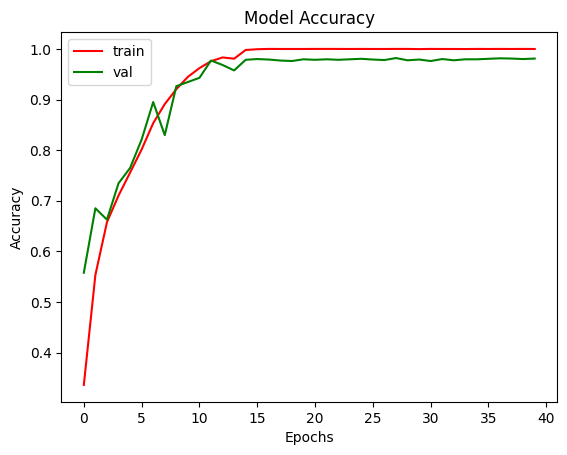

In [29]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

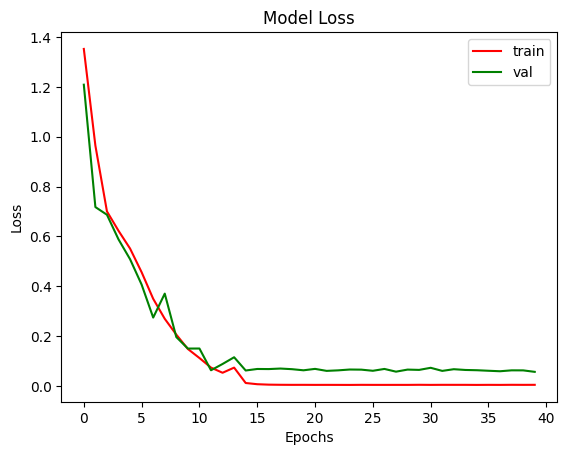

In [30]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

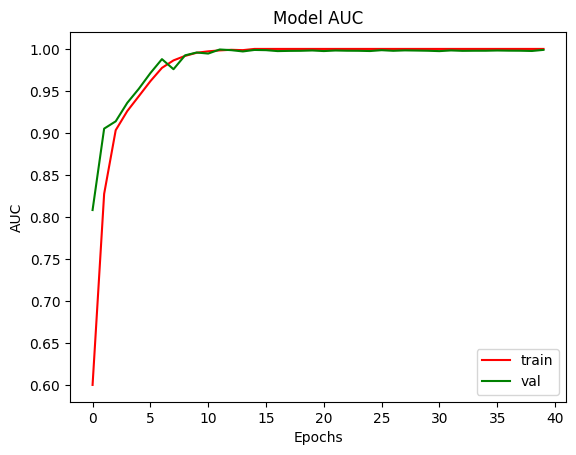

In [31]:
plt.plot(history.history['auc'], 'r')
plt.plot(history.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

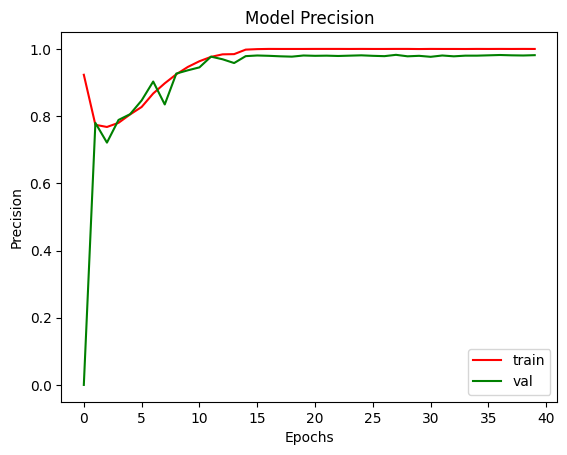

In [32]:
plt.plot(history.history['precision'], 'r')
plt.plot(history.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

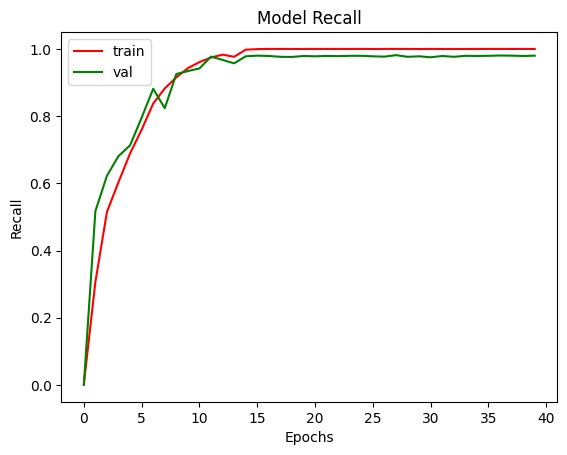

In [33]:
plt.plot(history.history['recall'], 'r')
plt.plot(history.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

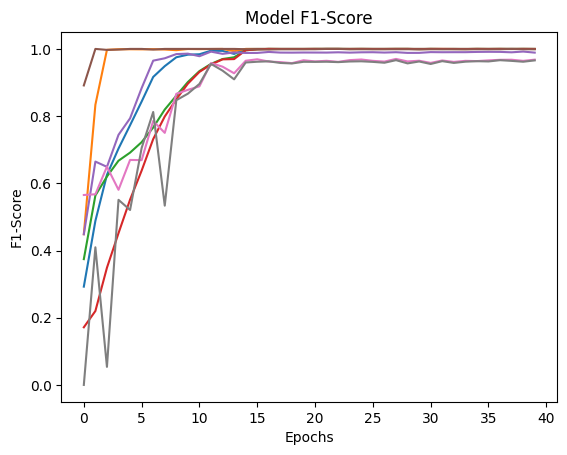

In [34]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

### <font color=orange> Test set Evaluation </font>
- Classification Report
- Confusion Matrix


In [35]:
  pred_labels = model.predict(x_test, batch_size=32)

  def roundoff(arr):
      arr[np.argwhere(arr != arr.max())] = 0
      arr[np.argwhere(arr == arr.max())] = 1
      return arr

  for labels in pred_labels:
      labels = roundoff(labels)

  print(classification_report(y_test, pred_labels, target_names=Classes))


64/64 [==============================] - 0s 6ms/step
                   precision    recall  f1-score   support

    Mild-Demented       0.99      0.99      0.99       494
Moderate-Demented       1.00      1.00      1.00       528
     Non-Demented       0.98      0.96      0.97       506
VeryMild-Demented       0.96      0.98      0.97       520

        micro avg       0.98      0.98      0.98      2048
        macro avg       0.98      0.98      0.98      2048
     weighted avg       0.98      0.98      0.98      2048
      samples avg       0.98      0.98      0.98      2048



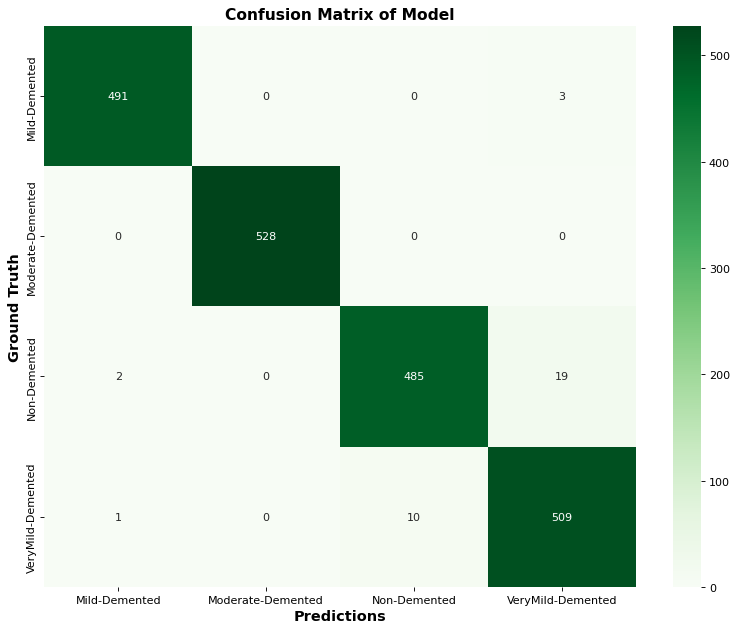

In [36]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(y_test, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= Classes, yticklabels=Classes)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)